# Predict Churning Customers

A credit analyst was asked to lay the landscape of the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.
Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Data: Prediction High Turnover.xlsx


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import shap

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

/Users/plthon/miniforge3/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/plthon/miniforge3/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_mask

# Load Data

In [2]:
df = pd.read_excel('Prediction High Turnover.xlsx')
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   
5              36  ...                       1                      2   
6              46  ...                       1                      3   
7              27  ...                       2                      2   
8              36  ...                       2                      0   
9              36  ...                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8             1350              24                1.182              

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [5]:
df.describe(include='object')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
# Check for missing values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# Check for unique value
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Observations:
- There are 10127 records in the dataset.
- There are 19 features in the dataset. CLIENTNUM is the unique identifier for each customer, so we can ignore this column. "Attrition_Flag" is the target variable.
- There are 14 numerical features and 5 categorical features.
- There are no missing values in the dataset.

# Exploratory Data Analysis

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Text(0, 0.5, 'Count')

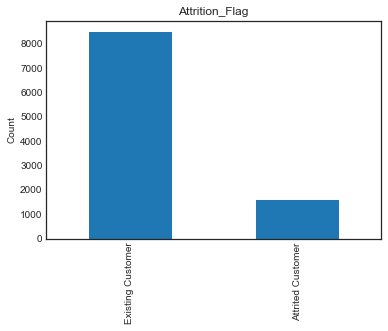

In [9]:
# Check the value in "Attrition_Flag"
print(df['Attrition_Flag'].value_counts())

# Plot the graph
df.Attrition_Flag.value_counts().plot.bar()
plt.title('Attrition_Flag')
plt.ylabel("Count")

There are 8500 existing customers and 1627 attrited customers in the dataset. The dataset is imbalanced.

In order to make analysis easier, we will map the Attrition_Flag to 0 and 1, where 0 represents existing customers and 1 represents attrited customers.

In [10]:
# Maps Attrition_Flag to 0 and 1
df['Attrition_Flag_transform'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
target_variable = 'Attrition_Flag_transform'

df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   
5              36  ...                      2        4010.0   
6              46  ...                      3       34516.0   
7              27  ...                      2       29081.0   
8              36  ...                      0       22352.0   
9              36  ...                      3       11656.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   
6                 2264          32252.0                 1.975   
7                 1396          27685.0                 2.204   
8                 2517          19835.0                 3.355   
9                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   
6             1330              31                0.722   
7             1538              36                0.714   
8             1350              24                1.182   
9             1441              32                0.882   

   Avg_Utilization_Ratio  Attrition_Flag_transform  
0                  0.061                         0  
1                  0.105                         0  
2                  0.000                         0  
3                  0.760                         0  
4                  0.000                         0  
5                  0.311                         0  
6                  0.066                 

In [11]:
# Select all numerical features
numerical_features = df.select_dtypes(include='number').columns.tolist()
numerical_features.pop(0)  # Remove CLIENTNUM
numerical_features.pop()  # Remove Attrition_Flag_transform

numerical_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Plot the distribution of each numerical feature and the target variable, in order to identify outliers and the relationship between each feature and the target variable.

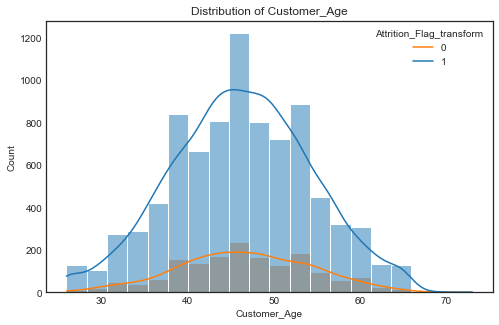

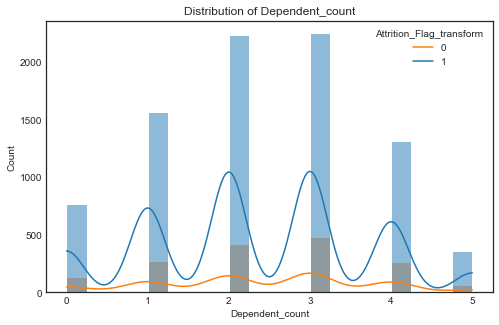

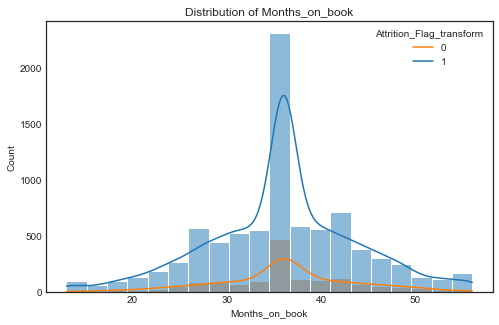

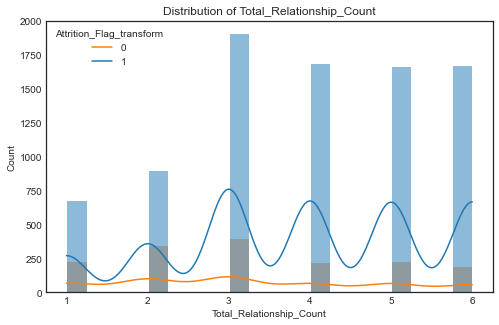

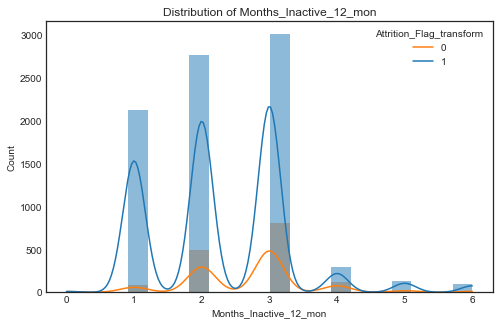

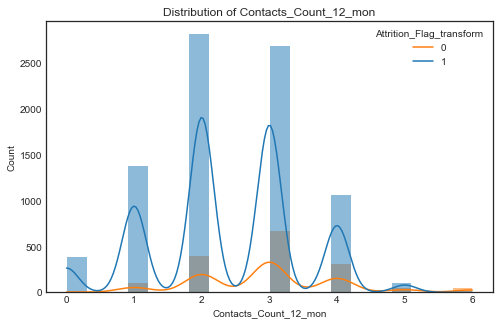

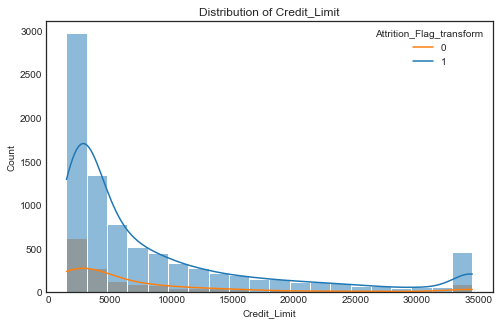

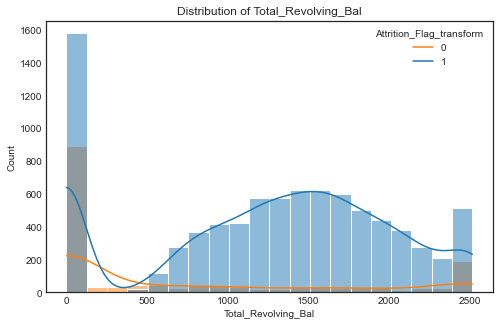

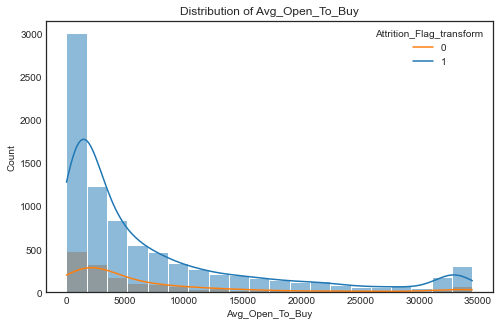

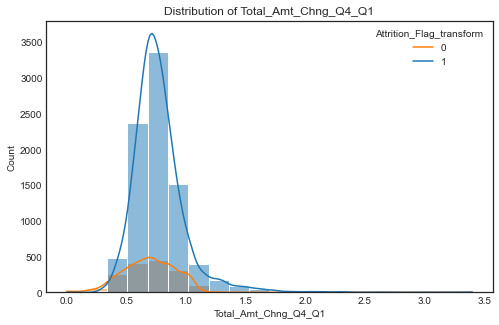

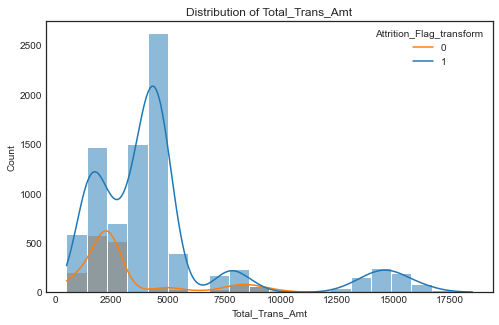

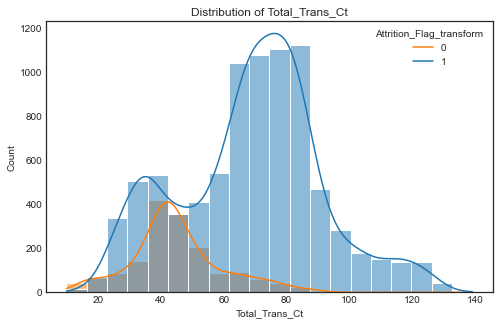

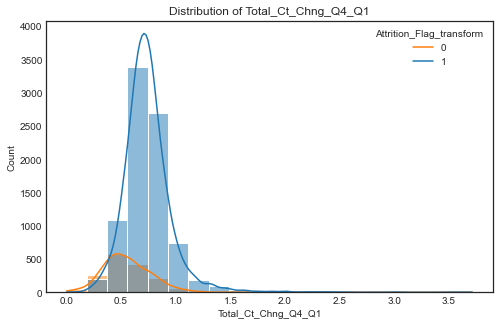

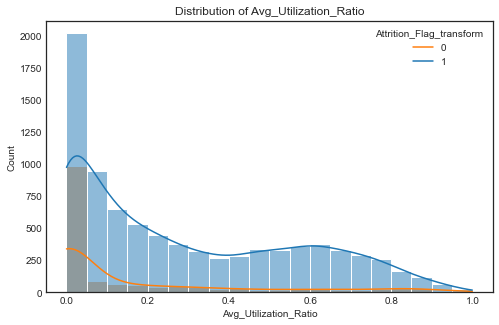

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Provide explicit legend labels
    legend_labels = df[target_variable].unique()
    plt.legend(title=target_variable, labels=legend_labels)

    plt.show()

Observations:
- The distribution of attrited customers and existing customers are similar for most of the numerical features.
- Total_Relationship_Count of 1, 2, and 3 are more likely to be attrited customers. If the number of products held by the customer is less, the customer is more likely to be attrited customers.
- Total_Revolving_Bal of 0 is more likely to be attrited customers.
- Total_Trans_Amt of less than 2500 is more likely to be attrited customers.
- Total_Trans_Ct of less than 60 is more likely to be attrited customers. If the number of transactions is less, the customer is more likely to be attrited customers.
- Avg_Utilization_Ratio of 0 is more likely to be attrited customers. If the card is not used, the customer is more likely to be attrited customers.

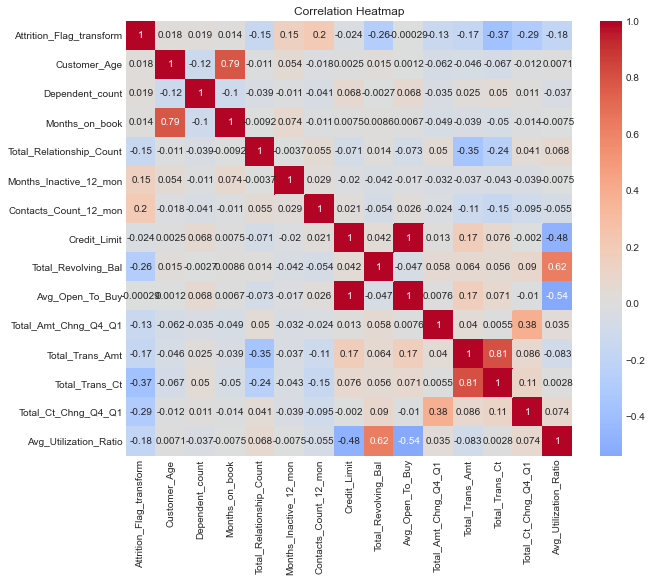

In [13]:
# Correlation matrix and heatmap
correlation_matrix = df[[target_variable] + numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

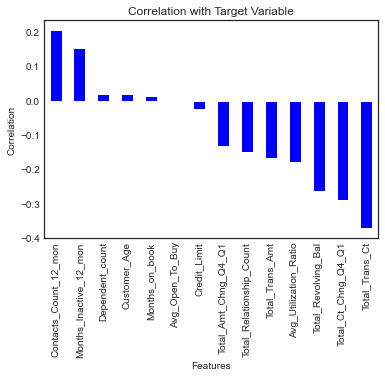

In [14]:
# Correlation with target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)
correlation_with_target.plot(kind='bar', color='blue')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

According to the correlation matrix and heatmap, the correlation between each numerical feature and the target variable is generally weak. The five features that correlates with Attrition_Flag are Contacts_Counts_12_mon, Months_Inactive_12_mon, Dependent_count, Customer_Age and Months_on_book. However, the correlation is still weak.

In [15]:
# Select categorical columns
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.pop(0)  # Remove Attrition_Flag

categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

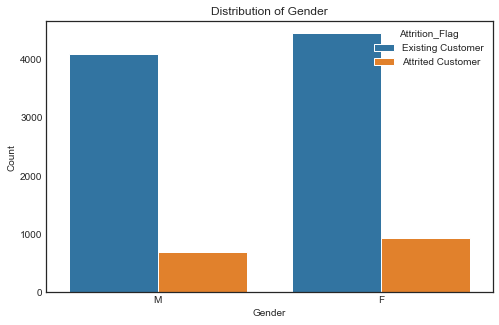

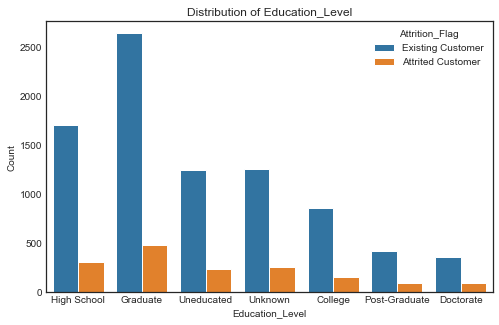

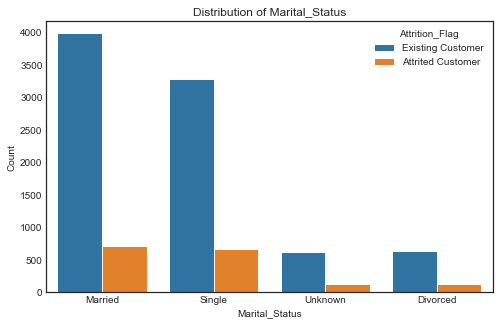

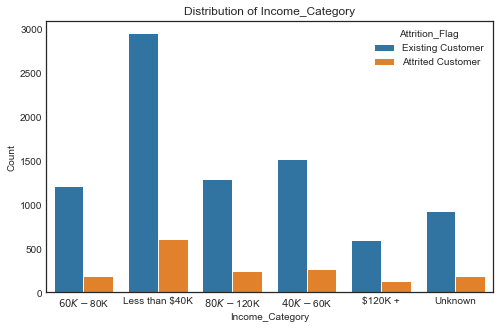

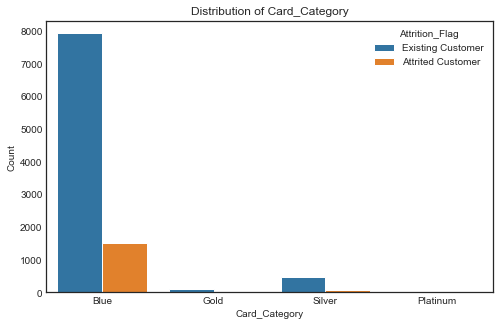

In [16]:
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='Attrition_Flag')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Attrition_Flag')
    plt.show()

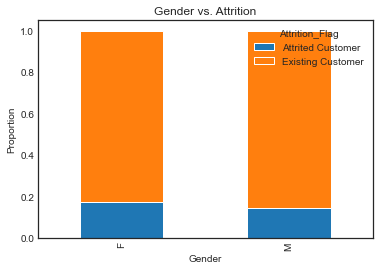

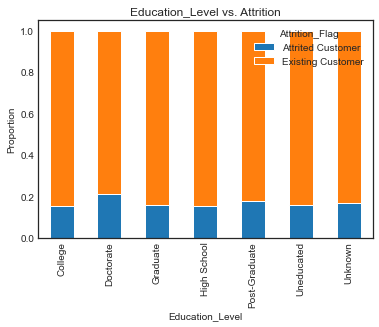

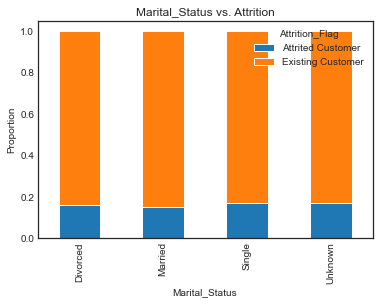

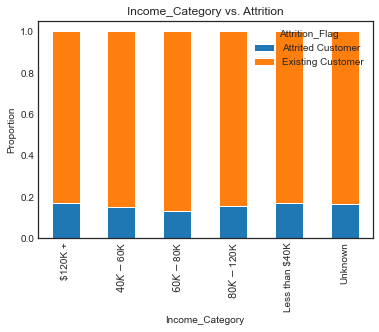

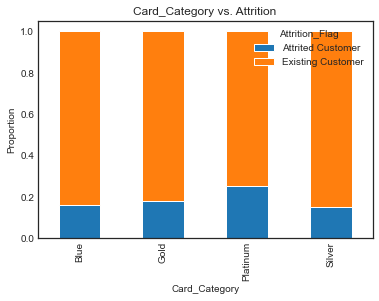

In [17]:
# Cross-tabulation between categorical features and target variable
for feature in categorical_features:
    cross_tab = pd.crosstab(df[feature], df['Attrition_Flag'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs. Attrition')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Attrition_Flag')
    plt.show()

From the cross-tabulation, generally there is no significant difference between the proportion of attrited customers and existing customers for each categorical feature.

In [18]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Attrition_Flag_transform  
0                  0.061                         0  
1                  0.105                         0  
2                  0.000                         0  
3                  0.760                         0  
4                  0.000                         0  

[5 rows x 22 columns]

<Figure size 720x432 with 0 Axes>

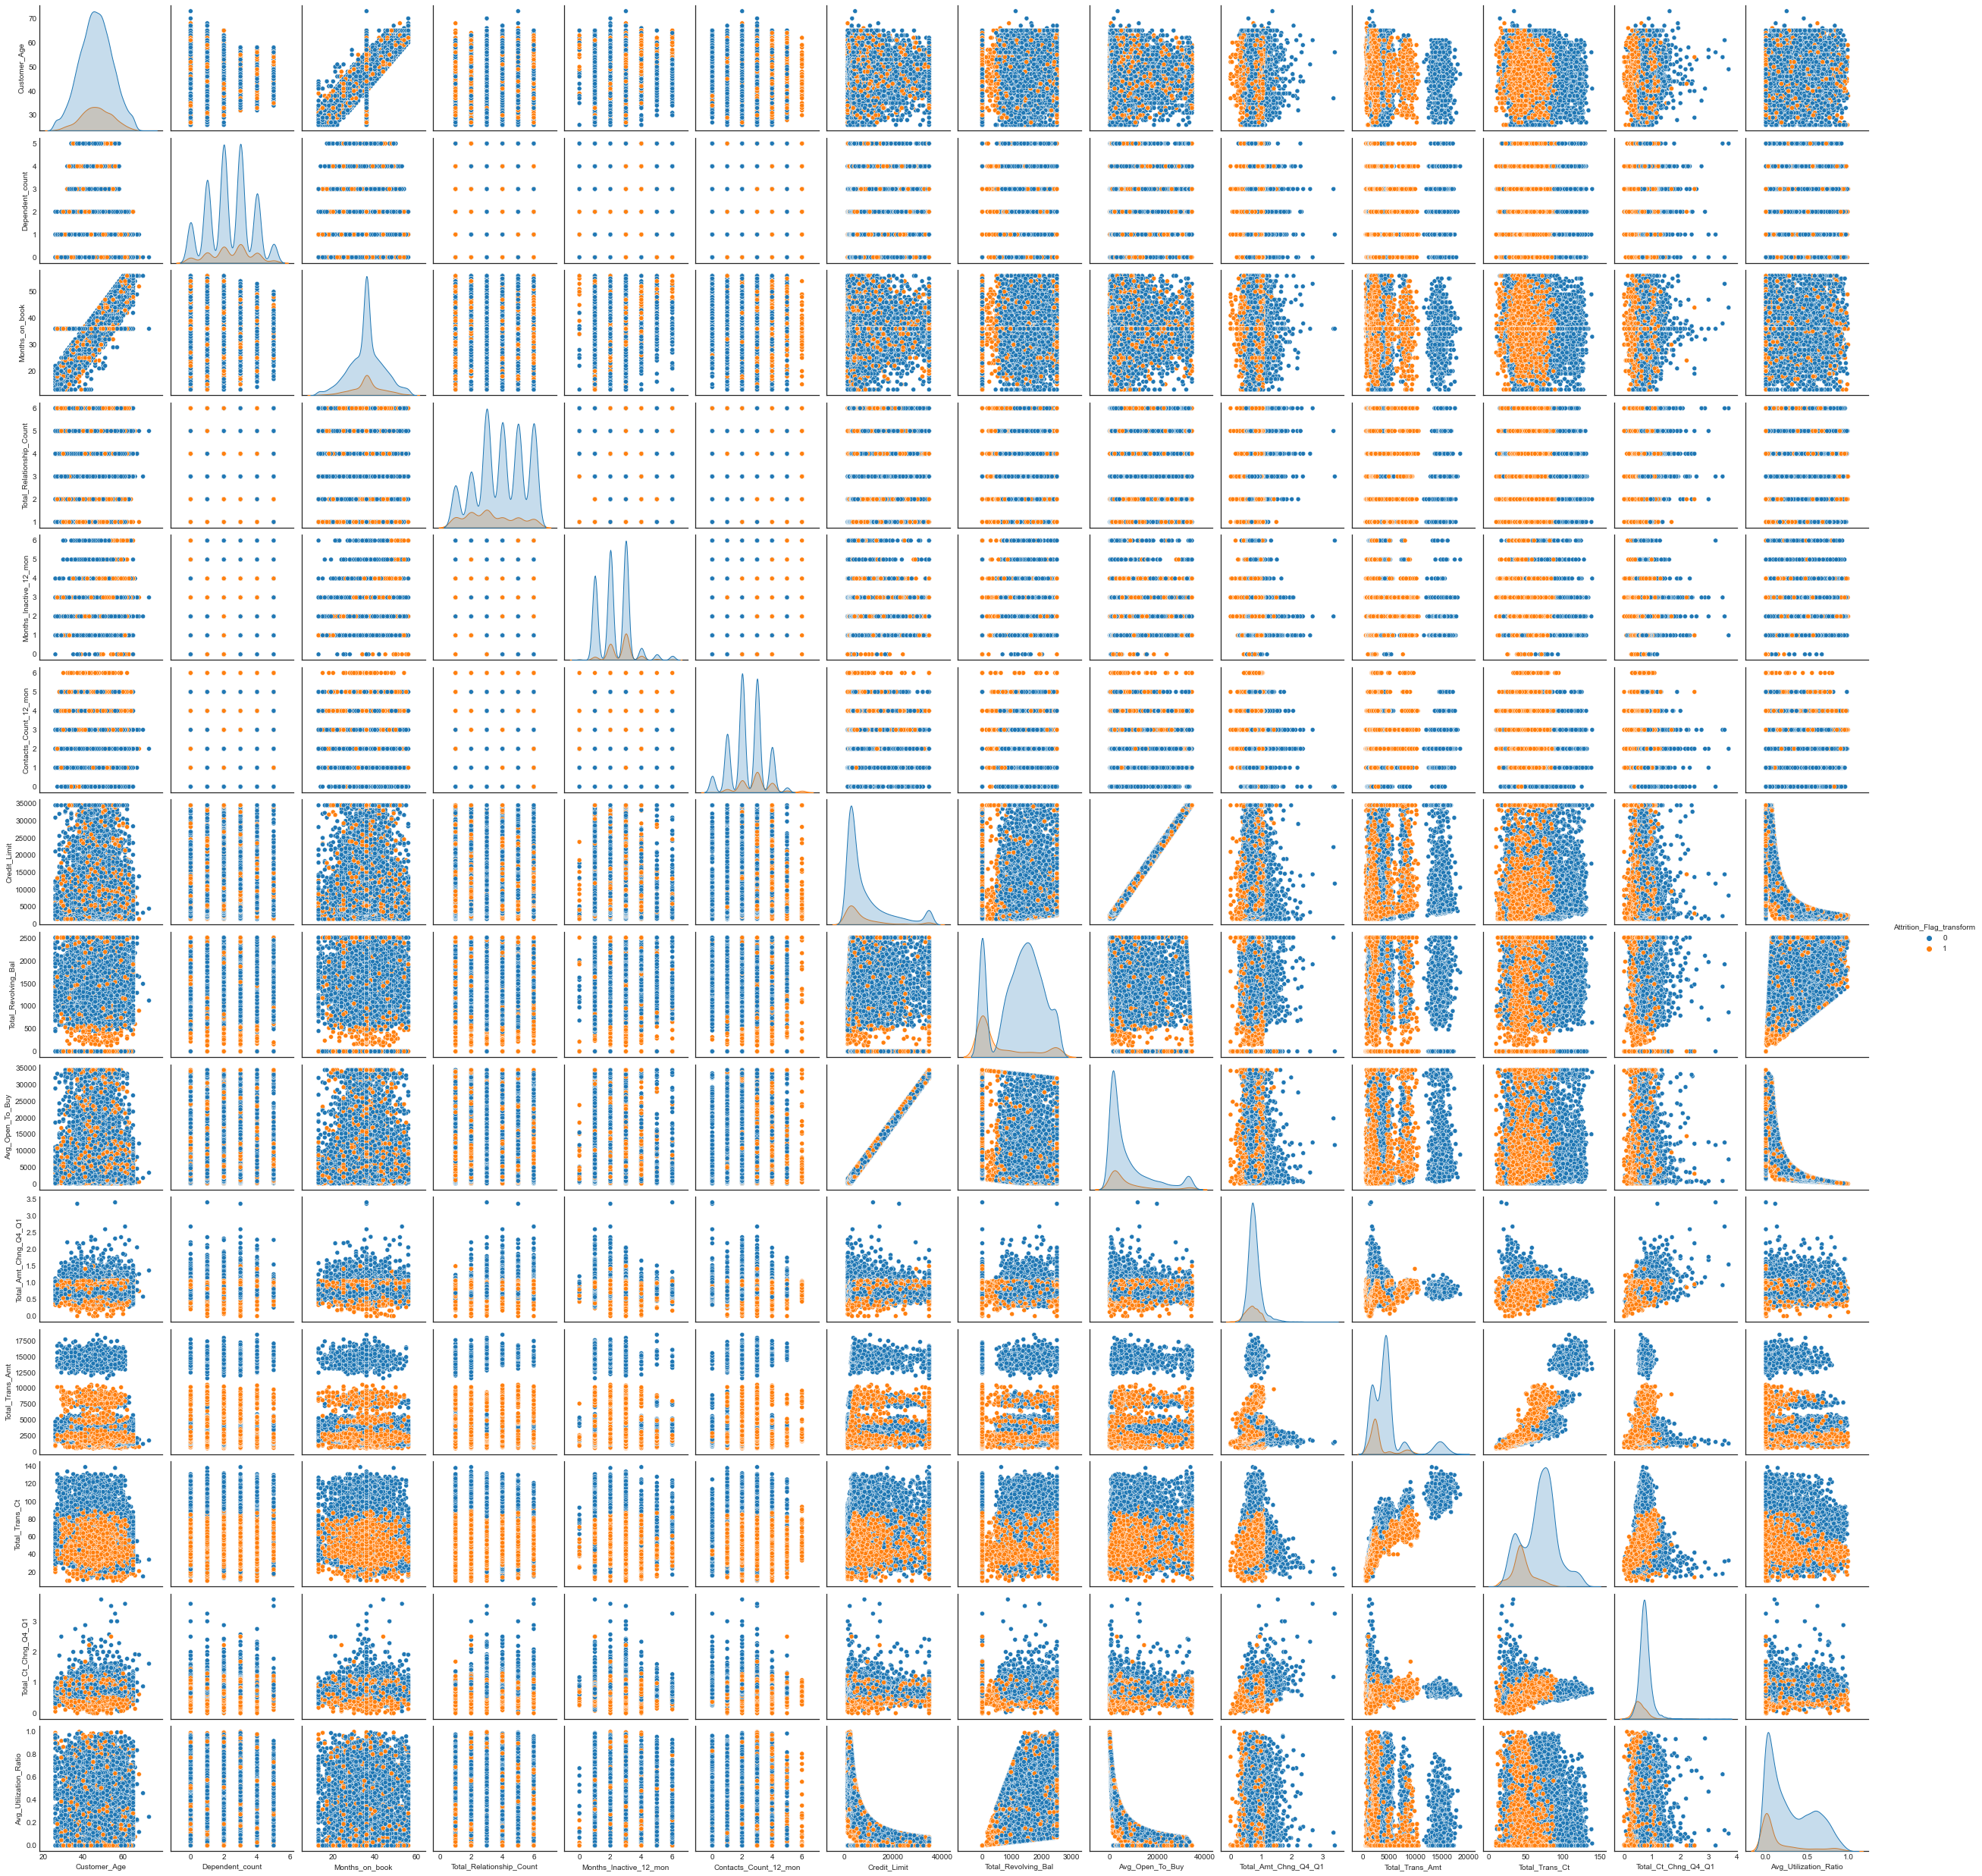

In [19]:
# Pair plot for all variables
plt.figure(figsize=(10, 6))
sns.pairplot(df[[target_variable] + numerical_features], hue = target_variable, diag_kind='kde')
plt.show()

### Map categorical features to numerical features

In [20]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [21]:
# Unique values for Education Level
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [22]:
# Unique values for Income Category
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [23]:
# Unique values for Card Category
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [24]:
# Check number of rows where Education Level, Income Category or Card Category are 'Unknown'
df[(df['Education_Level'] == 'Unknown') | (df['Income_Category'] == 'Unknown') | (df['Marital_Status'] == 'Unknown')].shape[0]

3046

In [25]:
# Define custom mappings for Education_Level, Income_Category, Card_Category, Gender and Marital_Status
education_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}

income_mapping = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_mapping = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

gender_mapping = {
    'M': 0,
    'F': 1
}

marital_mapping = {
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3
}

In [26]:
# Apply custom mapping to Education_Level, Income_Category, Card_Category, Gender and Marital_Status columns
df['Education_Level'] = df['Education_Level'].map(education_mapping)
df['Income_Category'] = df['Income_Category'].map(income_mapping)
df['Card_Category'] = df['Card_Category'].map(card_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

In [27]:
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383  Existing Customer            45       0                3   
1  818770008  Existing Customer            49       1                5   
2  713982108  Existing Customer            51       0                3   
3  769911858  Existing Customer            40       1                4   
4  709106358  Existing Customer            40       0                3   
5  713061558  Existing Customer            44       0                2   
6  810347208  Existing Customer            51       0                4   
7  818906208  Existing Customer            32       0                0   
8  710930508  Existing Customer            37       0                3   
9  719661558  Existing Customer            48       0                2   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                2               2                3              0   
1                4               1                1              0   
2                4               2                4              0   
3                2               0                1              0   
4                1               2                3              0   
5                4               2                2              0   
6                0               2                5              2   
7                2               0                3              1   
8                1               1                3              0   
9                4               1                4              0   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   
5              36  ...                      2        4010.0   
6              46  ...                      3       34516.0   
7              27  ...                      2       29081.0   
8              36  ...                      0       22352.0   
9              36  ...                      3       11656.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   
6                 2264          32252.0                 1.975   
7                 1396          27685.0                 2.204   
8                 2517          19835.0                 3.355   
9                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   
6             1330              31                0.722   
7             1538              36                0.714   
8             1350              24                1.182   
9             1441              32                0.882   

   Avg_Utilization_Ratio  Attrition_Flag_transform  
0                  0.061                         0  
1                  0.105                         0  
2                  0.000                         0  
3                  0.760                         0  
4                  0.000                         0  
5                  0.311               

# Model Building

## Train-Test Split

In [28]:
# Split data into train and test sets
X = df.drop(['CLIENTNUM', 'Attrition_Flag', 'Attrition_Flag_transform'], axis=1)
y = df['Attrition_Flag_transform']

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the splits
print(f"Training set shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shapes: X_train: (7088, 19), y_train: (7088,)
Test set shapes: X_test: (3039, 19), y_test: (3039,)


## Model Training with baselines models

### Logistic Regression

In [29]:
# Initialize the LogisticRegression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2543
           1       0.72      0.46      0.57       496

    accuracy                           0.88      3039
   macro avg       0.81      0.71      0.75      3039
weighted avg       0.87      0.88      0.87      3039

Confusion Matrix:
 [[2455   88]
 [ 266  230]]


Generally, the result is dissatisfactory as the model struggles to identify churning customers as shown with the low recall of 0.46. Since the task focuses on predicting churning customers, we are aiming for higher recall for class 1 (attrited customers).

### Random Forest

In [30]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.94      0.81      0.87       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

Confusion Matrix:
 [[2516   27]
 [  95  401]]


The result is better than Logistic Regression.

### XGBoost

In [31]:
# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.90      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

Confusion Matrix:
 [[2490   53]
 [  52  444]]


XGBoost performs better than Random Forest. Especially with an increase in recall for class 1 (attrited customers).

## Model Training: XGBoost with further tuning

### SMOTE: Synthetic Minority Oversampling Technique
SMOTE is a technique that generates synthetic data points for the minority class to balance the dataset.

Since the dataset is imbalanced, we will try to apply SMOTE to the training data to see if it improves the model performance.

In [32]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the count of each class in the resampled training data
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 5957, 1: 1131})
Class distribution after SMOTE: Counter({0: 5957, 1: 5957})


After applying SMOTE, the training data is now balanced.

In [33]:
# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2543
           1       0.86      0.93      0.89       496

    accuracy                           0.96      3039
   macro avg       0.92      0.95      0.94      3039
weighted avg       0.97      0.96      0.96      3039

Confusion Matrix:
 [[2469   74]
 [  36  460]]


Although the accuracy is lower than the previous XGBoost model, the recall for class 1 (attrited customers) is higher.

### Grid Search
with resampled training data.

In [34]:
# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters and their values for the grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize a new XGBClassifier model with the best parameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)

# Train the best model on the training data
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_es

The accuracy is the same, however the recall drops.

## Model Training: XGBoost with custom threshold
with resampled training data.

In [35]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the positive class
predicted_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.3

# Adjust predictions based on the custom threshold
custom_predictions = np.where(predicted_probabilities >= custom_threshold, 1, 0)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, custom_predictions)
classification_rep = classification_report(y_test, custom_predictions)
conf_matrix = confusion_matrix(y_test, custom_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2543
           1       0.82      0.95      0.88       496

    accuracy                           0.96      3039
   macro avg       0.91      0.95      0.93      3039
weighted avg       0.96      0.96      0.96      3039

Confusion Matrix:
 [[2441  102]
 [  26  470]]


## Model Training: XGBoost with class weights
with resampled training data.

In [36]:
# Calculate class weights
class_counts = np.bincount(y)
class_weight = class_counts[0] / class_counts[1]  # Ratio of negative to positive instances

# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weight)

# Train the model on the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2543
           1       0.83      0.95      0.88       496

    accuracy                           0.96      3039
   macro avg       0.91      0.95      0.93      3039
weighted avg       0.96      0.96      0.96      3039

Confusion Matrix:
 [[2445   98]
 [  26  470]]


Most optimal model so far in terms of accuracy and recall.

# Explainability

## Feature Importance
XGBoost calculates feature importance during the training process by considering the number of times a feature is used in decision trees and how much those splits contribute to improving the model's performance.

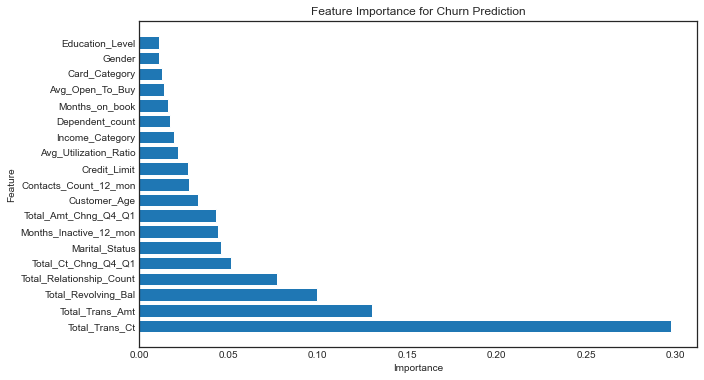

In [37]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Churn Prediction')
plt.show()

## SHAP: SHapley Additive exPlanations
- SHAP values consider not only the contribution of a feature itself but also the contribution of that feature in combination with other features. They decompose the prediction for a single instance into contributions from individual features, taking into account all possible feature interactions.
- SHAP values offer a more comprehensive understanding of how each feature contributes to individual predictions, allowing for more accurate and nuanced insights into model behavior.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


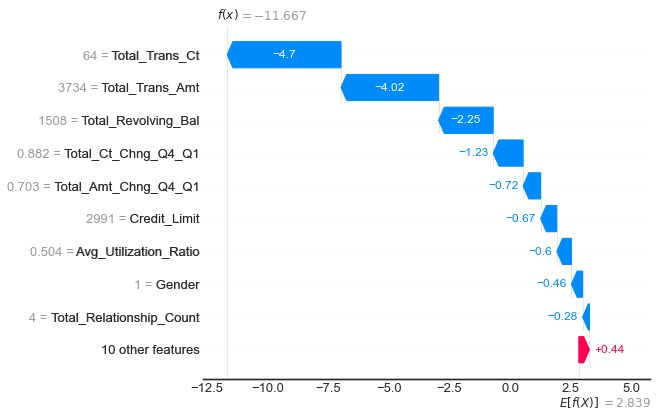

In [38]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Choose a sample for explanation (e.g., first instance)
sample_idx = 0

# Visualize the explanation
shap.plots.waterfall(shap_values[sample_idx], max_display=10, show=True)

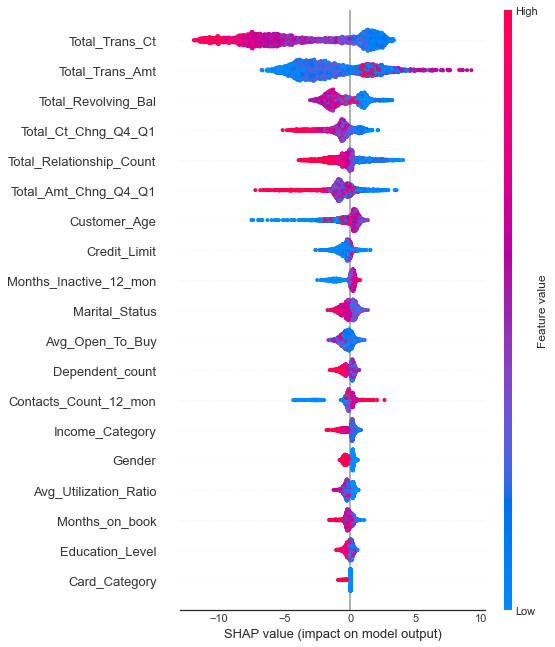

In [39]:
# Summary plot
shap.summary_plot(shap_values, X_test, show=True)

According to the SHAP summary plot, the most important features are:
- Total_Trans_Ct
- Total_Trans_Amt
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count

Based on the analysis above, a customer with low number of total transaction count in the last 12 months, low number of total transaction amount in the last 12 months, and low revolving balance is more likely to churn.